## CPSC 340 Lecture 2: Exploratory Data Analysis

This notebook is for the in-class activities. It assumes you have already watched the [associated video](https://www.youtube.com/watch?v=jBslaEzFJCE).

## Admin

- Syllabus quiz due Friday
- a1 due next Wednesday
- Tutorials start next week
- Office hours start tomorrow
- Q&A on [Ed](https://edstem.org/us/courses/3226/)
- I added a column to the [schedule](https://github.com/UBC-CS/cpsc340-2020w2/blob/main/docs/schedule.md) for "vs. CPSC 330" for those of you who have taken it.
  - Most of the overlap in the first 10 lectures
- For those who cannot access YouTube, I will also add the videos to Dropbox [here](https://www.dropbox.com/sh/t4hm5azptb6pjxl/AADhVcrXlXGixJV2TTOemu5Xa?dl=0).
- It may take a few classes to figure out the ideal class format for this flipped classroom offering of CPSC 340. 
  - Feedback is welcome!

## Lecture chapters

- Steps of ML
- What does data look like?
- Feature types
- Text data
- Images
- Data cleaning
- How much data
- Feature aggregation
- Feature selection
- Feature transformation
- Summary statistics
- Visualization
- Meta-discussion
- Summary

## True/False questions: data shape

1. When I say "You need to collect more data" do I probably mean you need more rows, or more columns?
2. I have a dataset about students with 10 features like age, GPA, major, etc. I can think of each student as a point in 10-dimensional space. 
3. I have a Twitter dataset with 100,000 different tweets. After applying a Bag of Words encoding, this dataset will have 100,000 rows. 
4. I have a dataset of YouTube videos in HD resolution (1080x1920p, in colour). Assume I am "flattening" the videos to make a tabular dataset. Since $1080\times 1920\times 3=6220800$, my tabular data will have $6220800$ columns. 

## Discussion questions

1. In lecture I aggregated the Titanic "deck" feature, so that instead of keeping track of the exact deck we only check if the passenger was in an upper or lower deck. When do you think this transformation would be more useful - when we have data on many passengers, or few passengers?
2. Under what circumstances would you combine two datasets "vertically" (combine the rows of one with the rows of the other) and under what circumstances would you combine two datasets "horizontally" (combine the columns of one with the columns of the other)

## True/False questions: summary statistics

1. If I have a feature whose median value is 1000 then >10% of the values are above 1000.
2. If I have a feature whose mean value is 1000 then >10% of the values are above 1000.
3. It is more common to take summary statistics across rows / within columns ("vertically") than vice versa.

## EDA example: housing dataset

As an example, we'll do some EDA on the [Kaggle House Prices dataset](https://www.kaggle.com/c/home-data-for-ml-course/) with house prices from Ames, Iowa. To run this notebook you'll need to download the data, unzip the data, rename `train.csv` to `housing.csv` and move it into this directory.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("housing.csv", index_col=0)

In [4]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


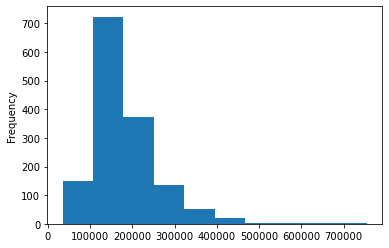

In [6]:
df['SalePrice'].plot.hist();

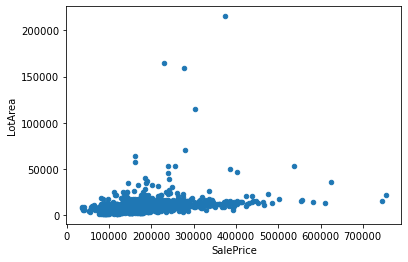

In [8]:
df.plot.scatter("SalePrice", "LotArea");

In [10]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000
